In [14]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [15]:
# 시드 설정
seed = 0
np.random.seed(seed)
tf.random.set_seed(seed)

In [16]:
# 데이터 값 (* 주의 : 반드시 float로 정의해줘야 함)
x_data = np.array([[2, 3], [4, 3], [6, 4], [8, 6], [10,7], [12, 8], [14, 9]], dtype = np.float32)
y_data = np.array([0,0, 0, 1, 1, 1, 1], dtype = np.float32).reshape(7, 1)

In [17]:
# 기울기, 절편 정의
W = tf.Variable(tf.random.uniform([2, 1], dtype = tf.float32))
b = tf.Variable(tf.random.uniform([1], dtype = tf.float32))

In [18]:
# 가설 함수 (시그모이드 함수)
def hypothesis(W, b):
    return tf.sigmoid(tf.matmul(x_data, W) + b)

In [19]:
# 손실 함수
def costFunc():
    return - tf.reduce_mean(y_data * tf.math.log(hypothesis(W, b)) + (1 - y_data) * tf.math.log(1 - hypothesis(W, b)))

In [20]:
# 그래프 함수
def graph():
    import matplotlib as mpl
    mpl.rc('font', family = 'Malgun Gothic')
    mpl.rc('axes', unicode_minus = False)
    fig, ax0 = plt.subplots()
    ax1 = ax0.twinx()
    ax0.set_title("학습 횟수에 따른 오차(cost)와 accuracy 변화")
    ax0.plot(cost_arr, 'r-', label = "cost")
    ax0.set_ylabel("Cost")
    ax0.grid(True)
    ax1.plot(accuracy_arr, 'b', label = "accuracy")
    ax1.set_ylabel("Accuracy")
    ax1.grid(False)
    ax0.set_xlabel("epochs")
    plt.show()

In [21]:
# optimizer 정의
opt = tf.keras.optimizers.SGD(learning_rate = 0.1)

In [22]:
epoch_arr = []
cost_arr = []
accuracy_arr = []

In [23]:
# 학습 수행
for i in range(2001):
    with tf.GradientTape() as tape:
        current_cost = costFunc()
    grads = tape.gradient(current_cost, [W, b])
    opt.apply_gradients(zip(grads, [W, b]))
    if i % 200 == 0:
        print(f'epochs = {i}, cost = {current_cost.numpy()}, W1 = {W.numpy()[0, 0]}, W2 = {W.numpy()[1, 0]}, b = {b.numpy()}')
    predicted = tf.cast(hypothesis(W, b) > 0.5, dtype = tf.float32)
    epoch_arr.append(i)
    cost_arr.append(current_cost.numpy())
    accuracy = np.mean(y_data == predicted)
    accuracy_arr.append(accuracy)

epochs = 0, cost = 1.0795499086380005, W1 = 0.13703562319278717, W2 = 0.07879505306482315, b = [0.5169016]


epochs = 200, cost = 0.31833285093307495, W1 = 0.7767338752746582, W2 = -0.6357908844947815, b = [-1.671697]
epochs = 400, cost = 0.2398236095905304, W1 = 0.8634781837463379, W2 = -0.5346622467041016, b = [-2.906674]
epochs = 600, cost = 0.19474676251411438, W1 = 0.8391607999801636, W2 = -0.3288418650627136, b = [-3.830055]
epochs = 800, cost = 0.16400791704654694, W1 = 0.7806606292724609, W2 = -0.10565709322690964, b = [-4.5777965]
epochs = 1000, cost = 0.14144375920295715, W1 = 0.7115945816040039, W2 = 0.11137694120407104, b = [-5.2087665]
epochs = 1200, cost = 0.12414481490850449, W1 = 0.6411635875701904, W2 = 0.31489598751068115, b = [-5.7554092]
epochs = 1400, cost = 0.11047594249248505, W1 = 0.5732265710830688, W2 = 0.5030409693717957, b = [-6.2379518]
epochs = 1600, cost = 0.0994236096739769, W1 = 0.5093486905097961, W2 = 0.6760554909706116, b = [-6.67001]
epochs = 1800, cost = 0.09031902253627777, W1 = 0.45003336668014526, W2 = 0.8349859118461609, b = [-7.061235]
epochs = 2000,

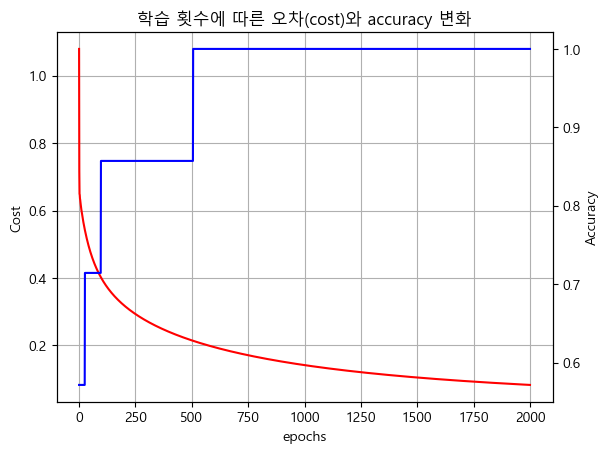

In [24]:
# 오차와 정확도 그래프 그리기 (x축 공유)
graph()

In [25]:
print("===================================")
print("W = ", W.numpy())
print("b = ", b.numpy()[0])
print("y_data = ", y_data)
print("sigmoid = ", hypothesis(W, b).numpy())
print("predicted = ", predicted.numpy())
print("Accuracy = ", accuracy)

W =  [[0.39528123]
 [0.98113656]]
b =  -7.4187346
y_data =  [[0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]]
sigmoid =  [[0.0244884 ]
 [0.05244103]
 [0.24554768]
 [0.8362155 ]
 [0.9677681 ]
 [0.9943685 ]
 [0.999038  ]]
predicted =  [[0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]]
Accuracy =  1.0
